In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
sales = pd.read_csv('supermarket_sales.csv')
sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [86]:
sales.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating', 'date', 'day', 'month', 'year', 'Hour'],
      dtype='object')

In [8]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [87]:
sales.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
date                       0
day                        0
month                      0
year                       0
Hour                       0
dtype: int64

In [9]:
sales.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.220360e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [11]:
sales['Date'].dtype

dtype('O')

In [12]:
sales['date'] = pd.to_datetime(sales['Date'])

In [13]:
sales['date'].dtype

dtype('<M8[ns]')

In [14]:
type(sales['date'])

pandas.core.series.Series

In [15]:
sales['day'] = (sales['date']).dt.day
sales['month'] = (sales['date']).dt.month
sales['year'] = (sales['date']).dt.year

In [16]:
sales['Time'] = pd.to_datetime(sales['Time'])

In [17]:
sales['Hour'] = (sales['Time']).dt.hour

In [18]:
sales['Hour'].value_counts()

19    113
13    103
15    102
10    101
18     93
11     90
12     89
14     83
16     77
20     75
17     74
Name: Hour, dtype: int64

In [23]:
sorted(sales['Hour'].unique())

[10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [26]:
len(sorted(sales['Hour'].value_counts().index))

11

In [27]:
sales['Hour'].nunique()

11

In [28]:
sales.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,day,month,year,Hour
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000,1000.000000,1000.000000,1000.0,1000.000000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270,15.256000,1.993000,2019.0,14.910000
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.220360e-14,11.708825,1.71858,8.693563,0.835254,0.0,3.186857
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000,1.000000,1.000000,2019.0,10.000000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000,8.000000,1.000000,2019.0,12.000000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000,15.000000,2.000000,2019.0,15.000000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000,23.000000,3.000000,2019.0,18.000000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000,31.000000,3.000000,2019.0,20.000000


In [29]:
categorical_columns = [cname for cname in sales.columns if sales[cname].dtype == "object"]

In [30]:
categorical_columns

['Invoice ID',
 'Branch',
 'City',
 'Customer type',
 'Gender',
 'Product line',
 'Date',
 'Payment']

In [35]:
len(sales['Branch'].unique().tolist())

3

In [36]:
sales['Branch'].nunique()

3

In [38]:
sales['Invoice ID'].nunique()

1000

In [40]:
for c in categorical_columns:
    print("# unique values in %s is %d" %(c,sales[c].nunique()))

# unique values in Invoice ID is 1000
# unique values in Branch is 3
# unique values in City is 3
# unique values in Customer type is 2
# unique values in Gender is 2
# unique values in Product line is 6
# unique values in Date is 89
# unique values in Payment is 3


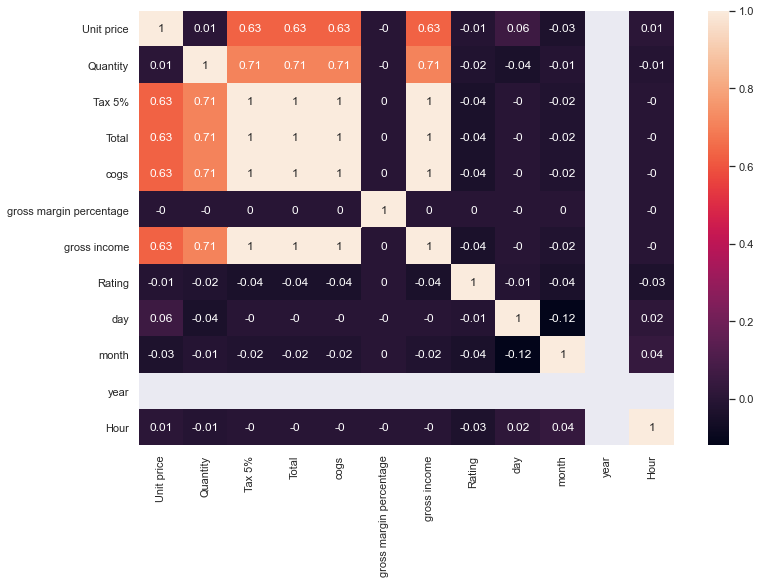

In [101]:
plt.figure(figsize = (12,8))
sns.heatmap(np.round(sales.corr(),2),annot=True)
plt.show()

In [94]:
np.round(sales.corr()['Total'],2)

Unit price                 0.63
Quantity                   0.71
Tax 5%                     1.00
Total                      1.00
cogs                       1.00
gross margin percentage    0.00
gross income               1.00
Rating                    -0.04
day                       -0.00
month                     -0.02
year                        NaN
Hour                      -0.00
Name: Total, dtype: float64

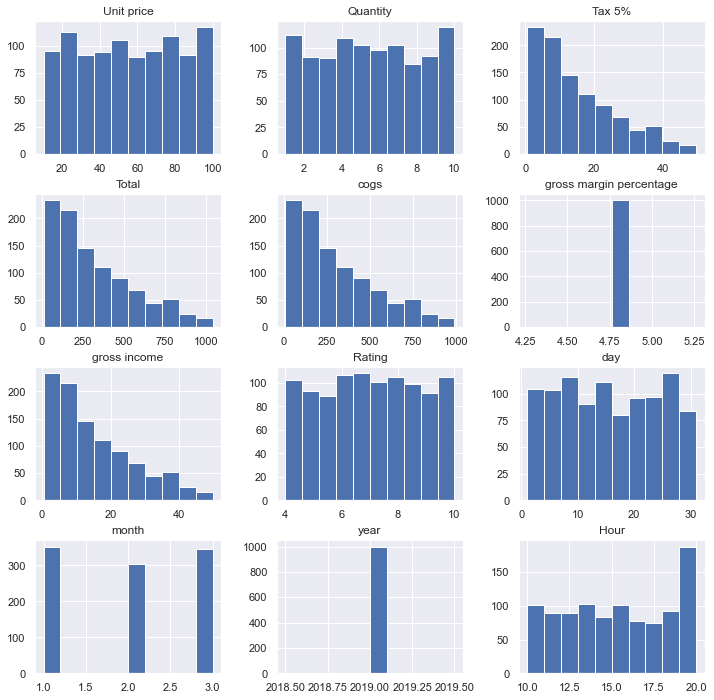

In [102]:
sales.hist(figsize=(12,12))
plt.show()

Text(0.5, 1.0, 'Which Branch is the most busy?')

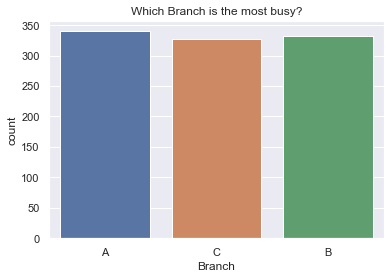

In [108]:
sns.countplot(x = sales['Branch']).set_title("Which Branch is the most busy?")

In [111]:
sales.Branch.value_counts()

A    340
B    332
C    328
Name: Branch, dtype: int64

Text(0.5, 1.0, 'Which Payment Method is most used?')

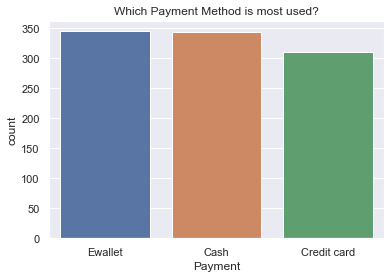

In [110]:
sns.countplot(x = sales['Payment']).set_title("Which Payment Method is most used?")

In [117]:
sales["Payment"].value_counts()

Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64

Text(0.5, 1.0, 'Which City is most busy?')

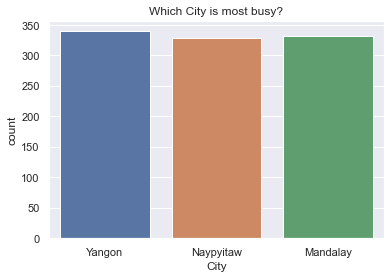

In [115]:
sns.countplot(x = sales['City']).set_title("Which City is most busy?")

In [116]:
sales["City"].value_counts()

Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64

In [42]:
sales['Gender'].value_counts()

Female    501
Male      499
Name: Gender, dtype: int64

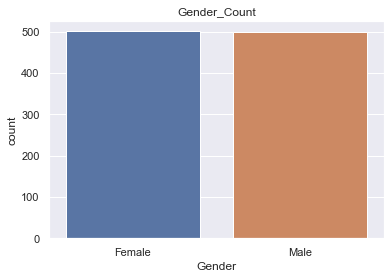

In [41]:
sns.set(style="darkgrid")
genderCount  = sns.countplot(x="Gender", data =sales).set_title("Gender_Count")

Text(0.5, 1.0, 'Ratings by Branch')

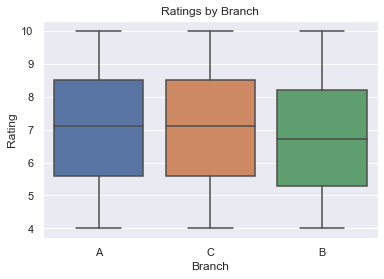

In [43]:
sns.boxplot(x="Branch", y = "Rating" ,data =sales).set_title("Ratings by Branch") 

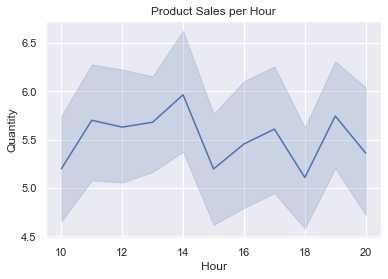

In [44]:
genderCount  = sns.lineplot(x="Hour",  y = 'Quantity',data =sales).set_title("Product Sales per Hour")

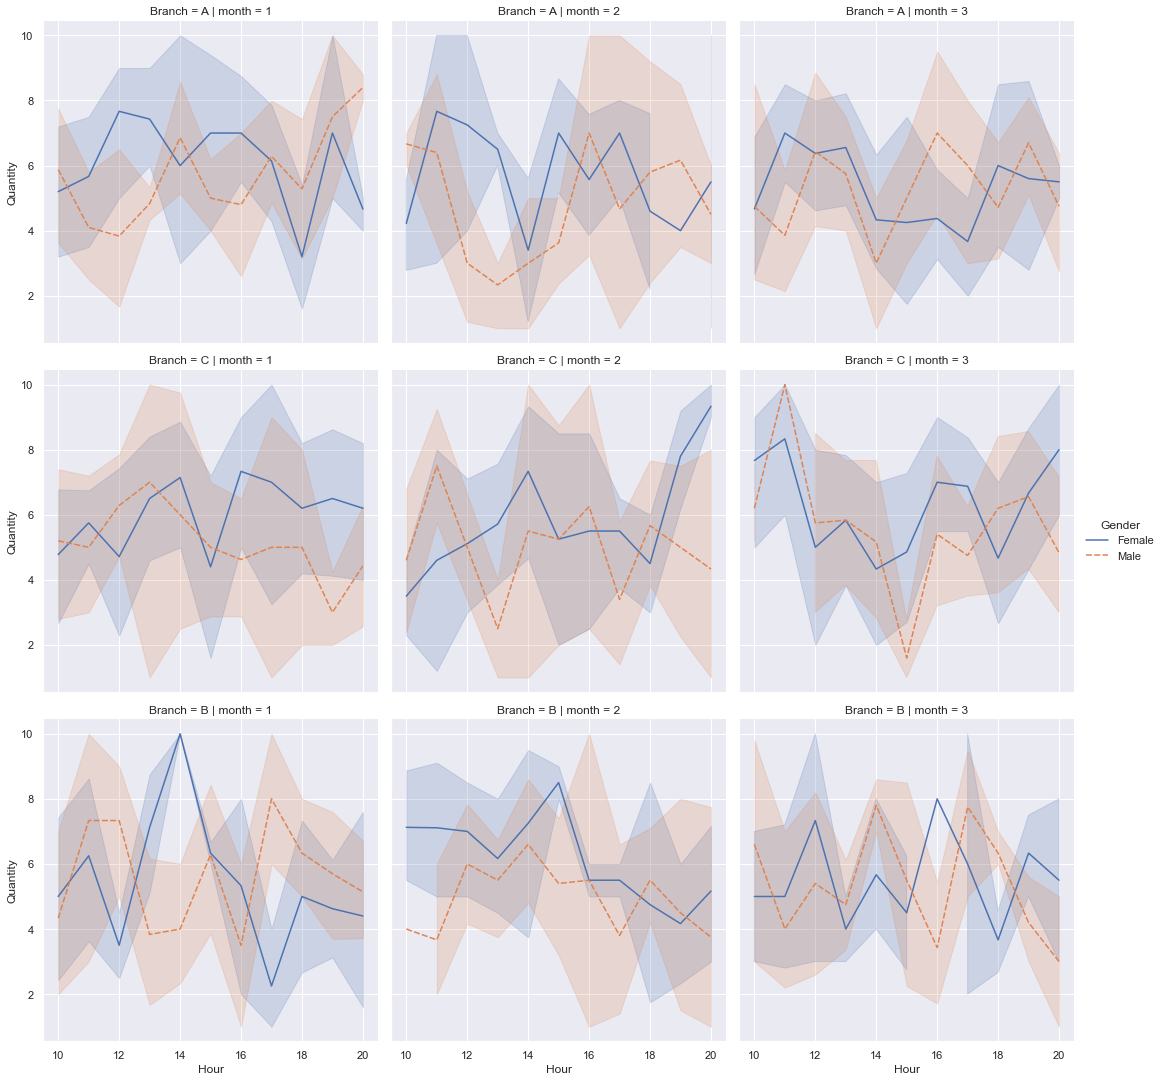

In [46]:
genderCount  = sns.relplot(x="Hour",  y = 'Quantity', col= 'month' , row= 'Branch',
                           kind="line", hue="Gender", style="Gender", data =sales)

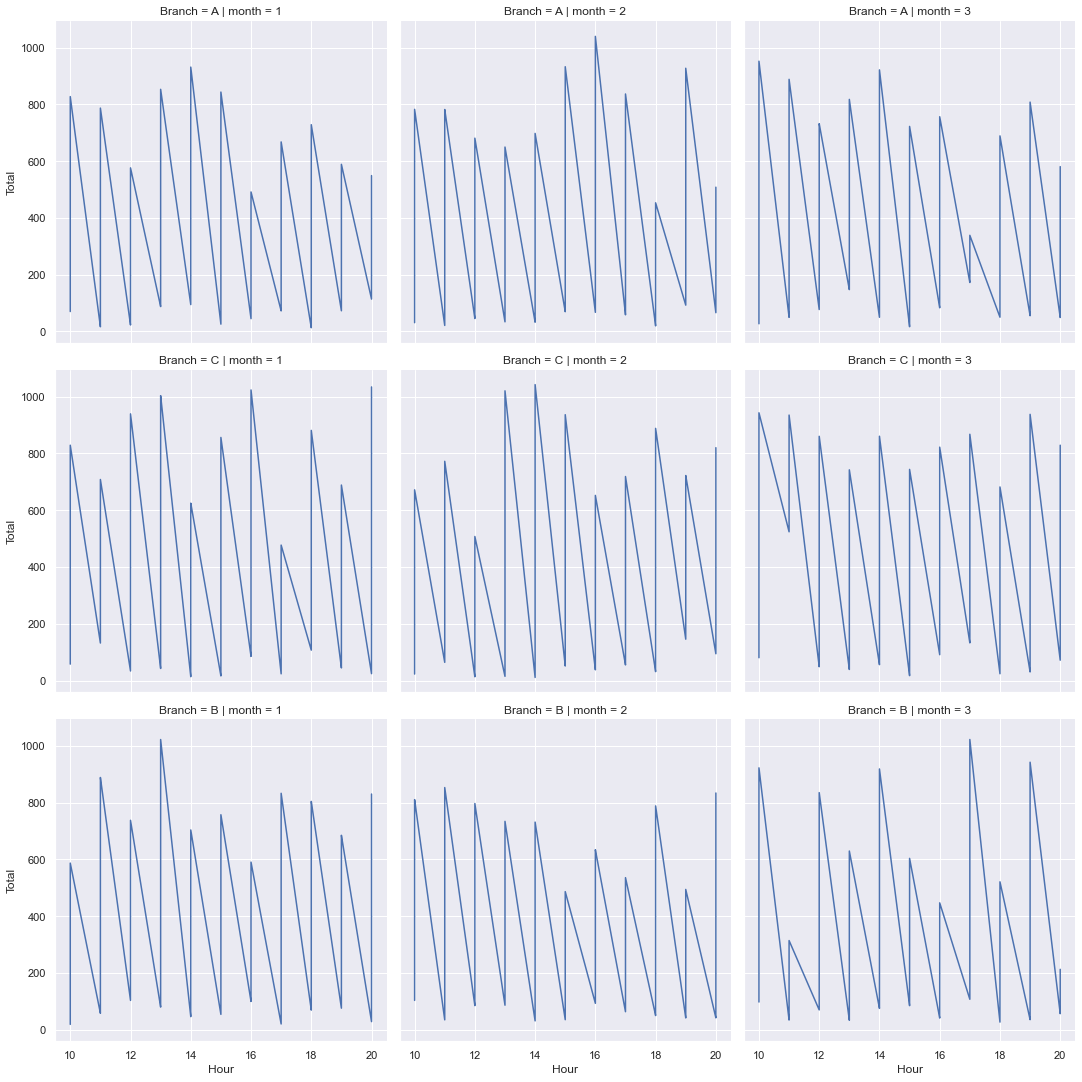

In [47]:
genderCount  = sns.relplot(x="Hour",  y = 'Total', col= 'month' , row= 'Branch',
                           estimator = None, kind="line", data =sales)

In [48]:
sales['Rating'].unique()

array([ 9.1,  9.6,  7.4,  8.4,  5.3,  4.1,  5.8,  8. ,  7.2,  5.9,  4.5,
        6.8,  7.1,  8.2,  5.7,  4.6,  6.9,  8.6,  4.4,  4.8,  5.1,  9.9,
        6. ,  8.5,  6.7,  7.7,  7.5,  7. ,  4.7,  7.6,  7.9,  6.3,  5.6,
        9.5,  8.1,  6.5,  6.1,  6.6,  5.4,  9.3, 10. ,  6.4,  4.3,  4. ,
        8.7,  9.4,  5.5,  8.3,  7.3,  4.9,  4.2,  9.2,  7.8,  5.2,  9. ,
        8.8,  6.2,  9.8,  9.7,  5. ,  8.9])

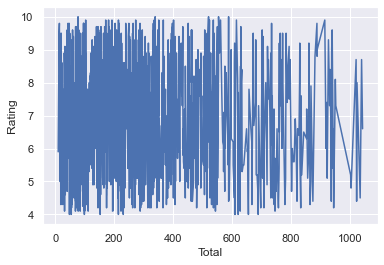

In [49]:
ageDisSpend = sns.lineplot(x="Total", y = "Rating", data =sales)

<AxesSubplot:xlabel='Quantity', ylabel='Product line'>

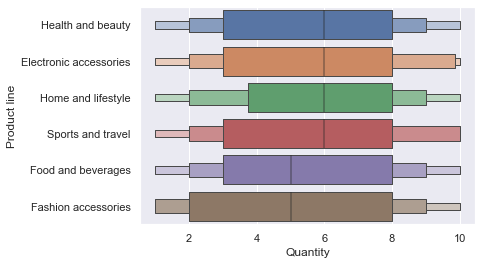

In [53]:
sns.boxenplot(y = 'Product line', x = 'Quantity', data=sales )

In [59]:
sales['Product line'].value_counts()

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Product line'>

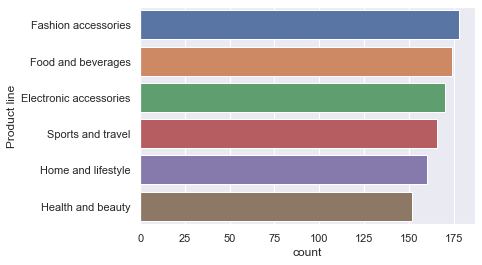

In [56]:
sns.countplot(y = 'Product line', data=sales, order = sales['Product line'].value_counts().index )

<AxesSubplot:xlabel='Total', ylabel='Product line'>

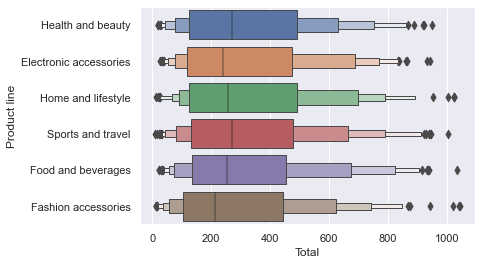

In [60]:
sns.boxenplot(y = 'Product line', x = 'Total', data=sales )

<AxesSubplot:xlabel='Total', ylabel='Product line'>

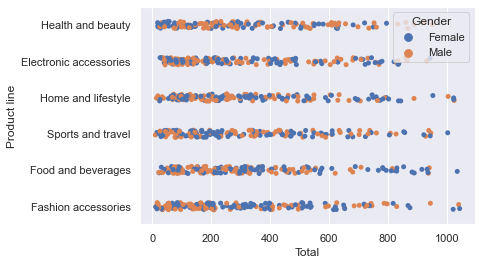

In [61]:
sns.stripplot(y = 'Product line', x = 'Total', hue = 'Gender', data=sales )

<AxesSubplot:xlabel='Rating', ylabel='Product line'>

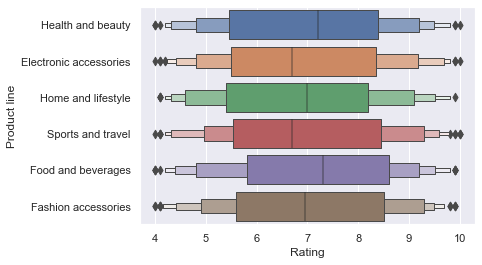

In [62]:
sns.boxenplot(y = 'Product line', x = 'Rating', data=sales )

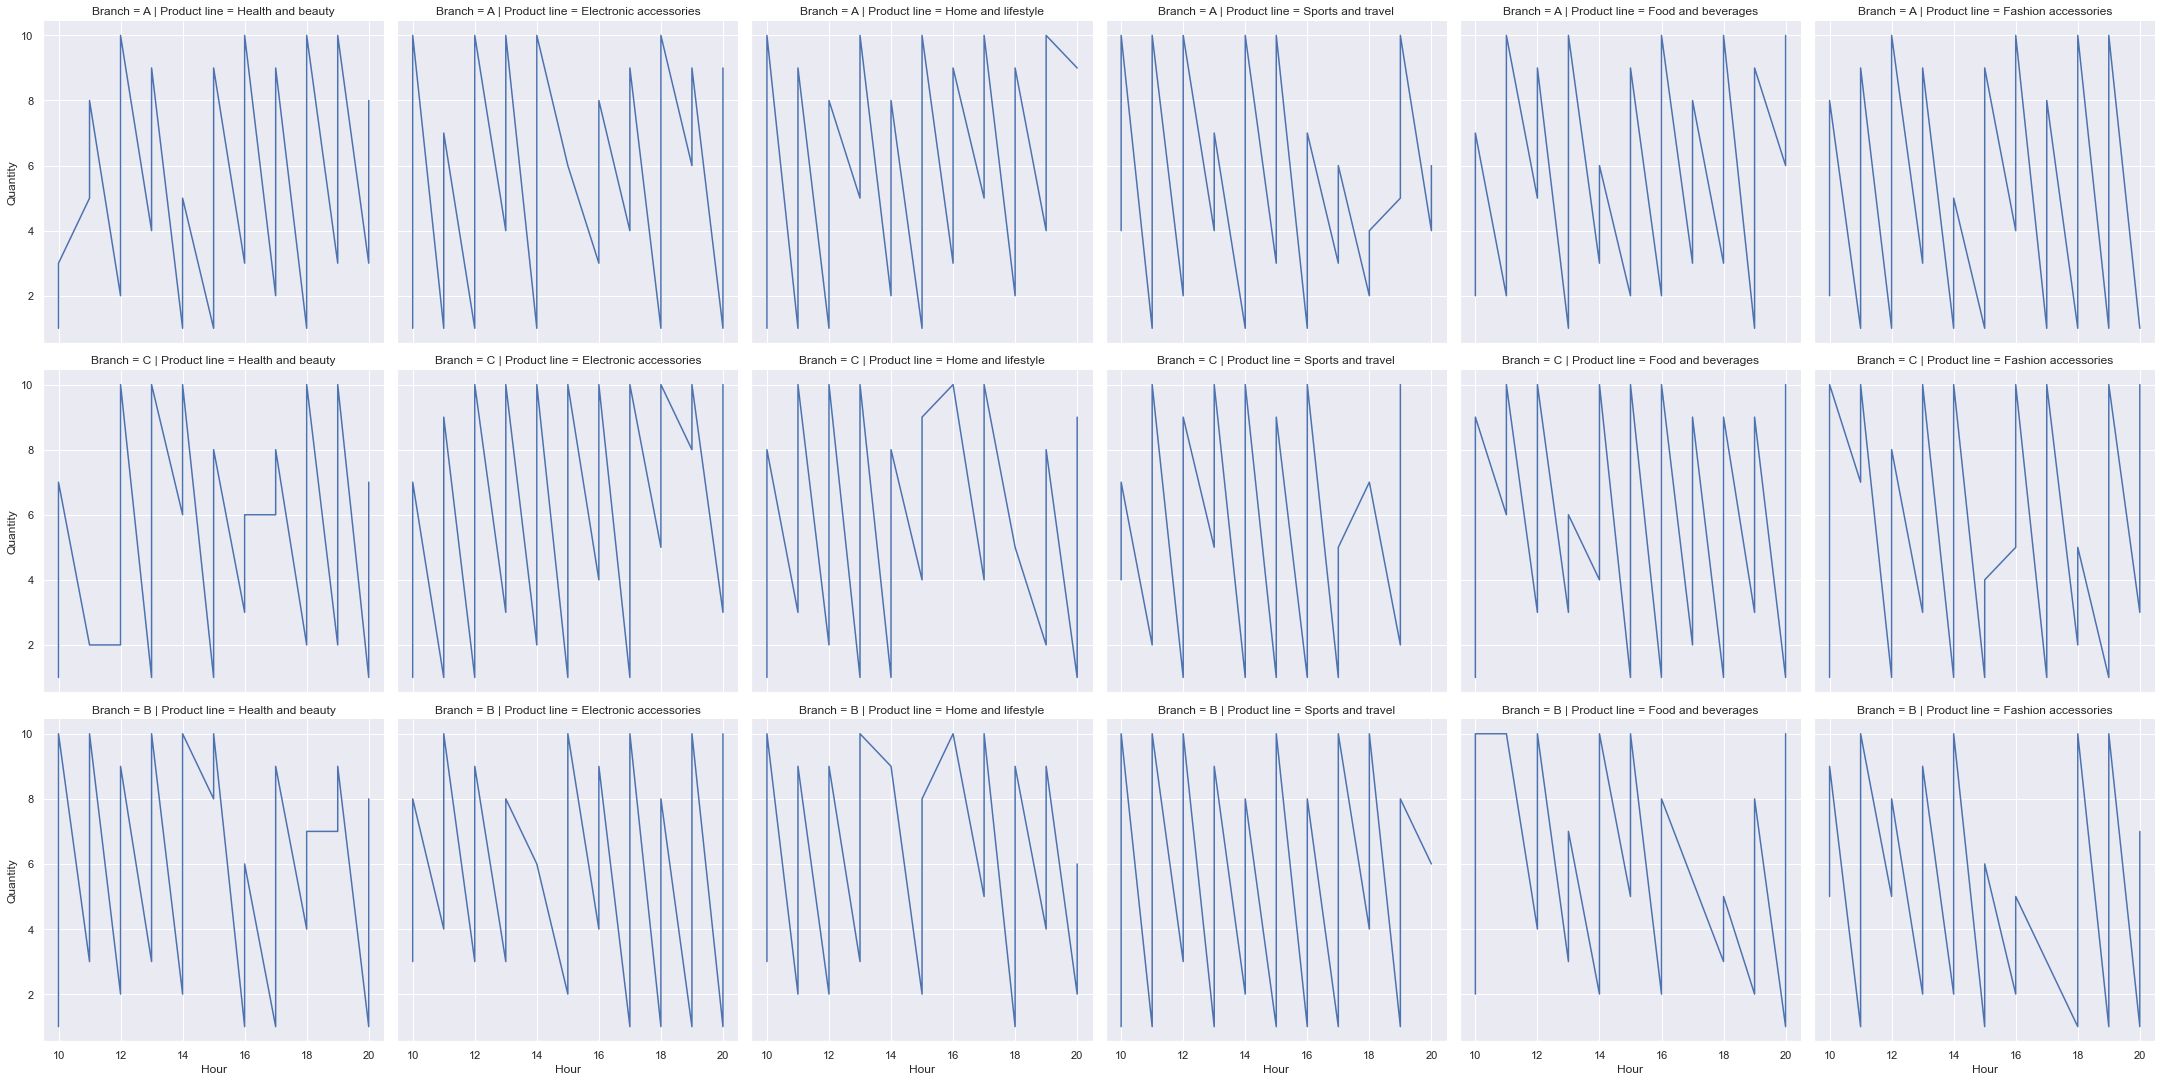

In [63]:
productCount  = sns.relplot(x="Hour",  y = 'Quantity', col= 'Product line' , row= 'Branch',
                            estimator = None, kind="line", data =sales)

Text(0.5, 1.0, 'Payment Channel')

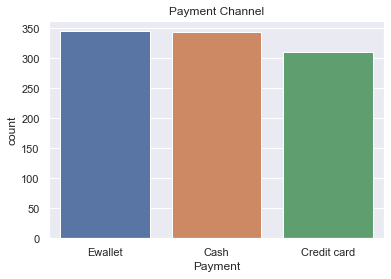

In [65]:
sns.countplot(x="Payment", data =sales).set_title("Payment Channel") 

Text(0.5, 1.0, 'Payment Channel by Branch')

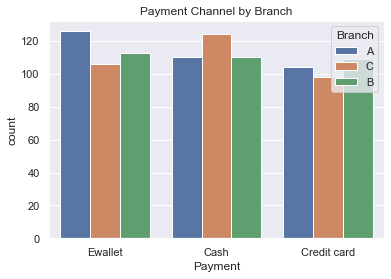

In [66]:
sns.countplot(x="Payment", hue = "Branch", data =sales).set_title("Payment Channel by Branch") 

In [67]:
sales['Customer type'].value_counts()

Member    501
Normal    499
Name: Customer type, dtype: int64

Text(0.5, 1.0, 'Customer type')

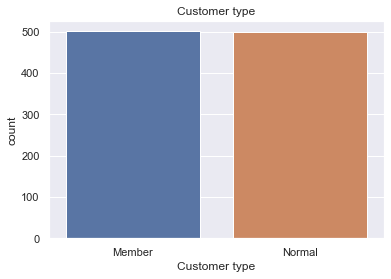

In [68]:
sns.countplot(x = "Customer type",data = sales).set_title("Customer type")

Text(0.5, 1.0, 'Customer Type by Branch')

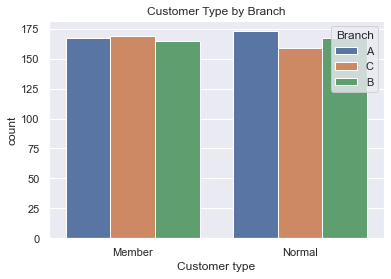

In [69]:
sns.countplot(x="Customer type", hue = "Branch", data =sales).set_title("Customer Type by Branch") 

In [76]:
sales.groupby(['Customer type']).agg({'Total': 'sum'})

,Total
Customer type,
Member,164223.444
Normal,158743.305


<AxesSubplot:xlabel='Customer type', ylabel='Total'>

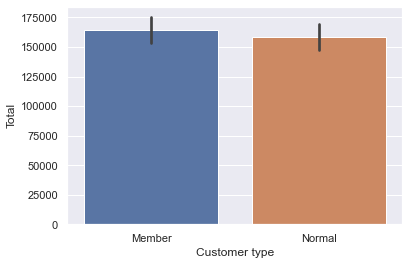

In [77]:
sns.barplot(x="Customer type", y="Total", estimator = sum, data=sales)

Text(0.5, 1.0, 'Customer Type')

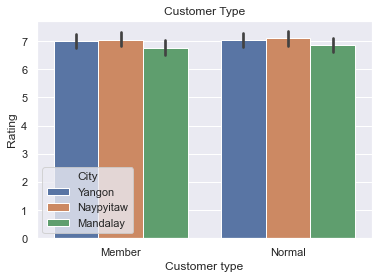

In [84]:
sns.barplot(x="Customer type",  y = "Rating", hue = "City",estimator = np.mean, data =sales).set_title("Customer Type")